# <center>DCT, WHT, SVD</center> 

In [1]:
import numpy as np
import scipy.linalg as LA
from scipy.fftpack import dct
from scipy.io import loadmat
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

## $$\color{blue}{\text{Question1}}$$

$\color{blue}{\text{Assume a Markov-1 process with covariance matrix R of size 8 × 8 and ρ = 0.91.
Compute the Energy Packing Efficiency}}$ $\color{blue}{\text{ and De-correlation of the Walsh-Haddamard Transform and Discrete Cosine Transform for the above process. What is your }}$
$\color{blue}{\text{observation about the eigenvectors of R in relation to the DCT basis? }}$


### Energy Packing Efficiency 
The energy packing effiency of a covariance matrix $R$ depends on the number of coeffieints we are using and what fraction of the energy can we pack in that. If we are using $m$ coefficients and there are total $N$ coefficients, the energy packing efficiency at $m$, $EPE_{m}$, is given by

$$
EPE_{m} = \frac{\Sigma_{i=1}^{m}R_{i, i}}{\Sigma_{i=1}^{N}R_{i, i}}
$$

Clearly the energy packing efficiency will be high even with low values of $m$ if the first few coefficients contain a bulk of the energy. It is to be noted than an inherent assumption is the coefficients are in the decreasing order, i.e., 

$$
R(1, 1) \geq R(2, 2) \dots \geq R(N, N)
$$

### Decorrelation Efficiency
The decorrelation efficiency measures how well the transformed data $R'$ is decorrelated compared to the original data $R$. It is defined as

$$
\eta = 1 - \frac{\alpha}{\beta}
$$

$$
\alpha = \Sigma_{i, j = 1, i \neq j}^{N}|R'_{i, j}|
$$

$$
\beta = \Sigma_{i, j = 1, i \neq j}^{N}|R_{i, j}|
$$

Clearly, for a given $R$, $\eta$ will be high when the off-diagonal elements in $R'$ are close to zero.

In [2]:
def epe(R):
    """
    Computes the energy packing efficiency of a transformed matrix
    
    Args:
        R (np.array): transformed matrix
    
    """
    # <---
    diag_vals = np.abs(np.diag(R))
    total_energy = np.sum(diag_vals)
    energy_packed = np.cumsum(diag_vals)
    return energy_packed/total_energy
    # --->
    
def decor_eff(r, R):
    """
    Computes de-correlation efficiency of a transformed matrix
    
    Args:
        r (np.array): original matrix
        r_ (np.array): transformed matrix
    
    """
    # <---
    n = np.shape(r)[0]
    non_diagonal_vals = 1-np.eye(n)
    r_ = np.abs(non_diagonal_vals*r)
    R_ = np.abs(non_diagonal_vals*R)
    alpha = np.sum(R_)
    beta = np.sum(r_)
    eta = 1-(alpha/beta)
    return eta
    # --->

### Co-variance Matrix
This function generates the covariance for a Markov-1 process with a given parameter $\rho$. The covariance matrix $R$ is given by

$$
R_{i,j} = \rho^{|i-j|}
$$

### Walsh Haddamard Transform
This function generates the Walsh Haddamard matrices $H_{n}$, are of the form $N \times N$ where $N = 2^{n}, n \in \{1, 2, ... \}$. All of these matrices can be generated from a core matrix $H_{1}$.

$$H_{1} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

The higher order matrices can be generated from $H_{1}$ recursively as 

$$
H_{n} = H_{n-1}\otimes H_{1} = H_{1} \otimes H_{n-1}, \quad n \geq 2
$$

###   2D Walsh Haddamard Transform
This Function performs 2D WHT using 1D WHT matrices. Given an image $U$ of the shape $m \times n$, its 2D WHT $V$ can be calculated as 

$$
V = H_{m}UH_{n}
$$

where $H_{i}$ is the 1D unitary H matrix of size $i \times i$. It must be noted that $(m, n)$ must be powers of $2$ for the transform to be applied.

### Discrete Cosine Transform
This function generates the matrix to perform unitary 1D type 2 DCT on an array of length $N$. The matrix $C$ has the form

$$
    C(k, n)= 
\begin{cases} \frac{1}{\sqrt{N}},        \text{if   } k= 0,  0 \leq n \leq N-1\\
    \sqrt{\frac{2}{N}}cos\left[\frac{\pi(2n+1)k}{2N}\right], \text{if } \quad 1 \leq k \leq N-1, \quad 0 \leq n \leq N-1
\end{cases}
$$

###  2D Discrete Cosine Transform
This function performs 2D DCT using 1D DCT matrices. Given an image $U$ of the shape $m \times n$, its 2D DCT $V$ can be calculated as 

$$
V = C_{m}UC_{n}
$$

where $C_{i}$ is the 1D unitary DCT matrix of size $i \times i$



Energy Packing Efficiency of Walsh-Haddamard Transform:
[0.793 0.803 0.831 0.843 0.942 0.954 0.988 1.   ]

Decorrelation Efficiency of Walsh-Haddamard Transform:
0.9485667904674057

Energy Packing Efficiency of DCT:
[0.793 0.909 0.948 0.967 0.979 0.987 0.994 1.   ]

Decorrelation Efficiency of DCT:
0.9804711989227338



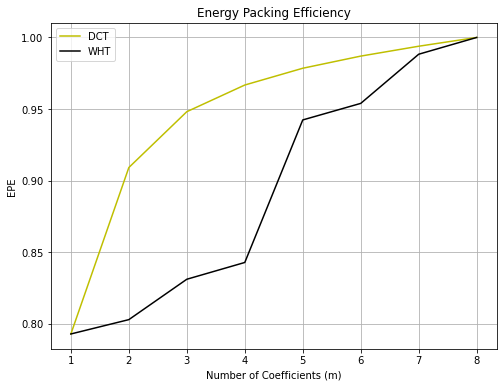

In [3]:
# Construct the 8 X 8 covariance matrix `r` of a Markov-1 process.
# <---
n = 8
rho = 0.91
r = rho**np.abs(np.meshgrid(np.arange(n),np.arange(n))[0]- np.meshgrid(np.arange(n),np.arange(n))[1])
    
# --->

# Construct the Walsh-Haddamard Transform matrix.
# <---
def Haddamard_matrix(n):
    H1 = np.array(([1, 1], [1, -1]))/np.sqrt(2)
    H = H1.copy()
    for i in range(1, n):
        H = np.kron(H, H1)
    return H    

# --->    

# Construct the DCT Transform matrix.
# <---
def DCT_matrix(N):
    n, k = np.meshgrid(np.arange(N), np.arange(N))
    C = np.sqrt(2/N)*(np.cos(np.pi*(2*n+1)*k/(2*N)))
    C[k == 0] = np.sqrt(1/N)
    return C
# --->

# Transform `R` using WHT and DCT and name the transforms
# `wht_R` and `dct_R` respectively.
# <---

##  WHT transform
x, y = np.shape(r)
n_x = int(np.ceil(np.log2(x)))
n_y = int(np.ceil(np.log2(y)))
H_x = Haddamard_matrix(n_x)
H_y = Haddamard_matrix(n_y)
wht_R = H_x@r@(H_y.T)

## DCT transform
m, n = np.shape(r)
A = DCT_matrix(m)
B = DCT_matrix(n)
dct_R = A@r@(B.T)

# --->

print('Energy Packing Efficiency of Walsh-Haddamard Transform:')
print(epe(wht_R))
print()

print('Decorrelation Efficiency of Walsh-Haddamard Transform:')
print(decor_eff(r, wht_R))
print()

print('Energy Packing Efficiency of DCT:')
print(epe(dct_R))
print()

print('Decorrelation Efficiency of DCT:')
print(decor_eff(r, dct_R))
print()


## Visualise
plt.figure(figsize=(8, 6))
plt.plot(np.arange(n)+1, epe(dct_R) , 'y')
plt.plot(np.arange(n)+1, epe(wht_R), 'black')
plt.xlabel("Number of Coefficients (m)")
plt.ylabel("EPE")
plt.title("Energy Packing Efficiency")
plt.legend(["DCT", "WHT"])
plt.grid(True)
plt.show()
print()

# $$\color{blue}{\text{Question2}}$$
$\color{blue}{\text{Find $β^2R^{-1}$, where $β^2=\frac {1-ρ^2}{1+\rho^2}$ Does $β^2R^{-1}$ have a tridiagonal structure?. Is it close to the tridiagonal matrix Q given by}}$
$\color{blue}{{
Q = \begin{bmatrix} 1-\alpha & -\alpha & 0 & 0 & 0 & 0& 0 & 0\\ -\alpha & 1 & -\alpha & 0 & 0 & 0& 0 & 0\\ 0 & -\alpha & 1 & -\alpha & 0 & 0&0 & 0\\ 0 & 0 & -\alpha & 1& -\alpha& 0 & 0& 0 \\0 & 0 & 0& -\alpha & 1&-\alpha & 0 & 0\\0 & 0& 0 & 0 &-\alpha &1 & -α &0 \\ 0& 0 & 0& 0 & 0& -\alpha & 1&-\alpha \\0& 0 & 0& 0 & 0 & 0 & -\alpha & 1-α\end{bmatrix}}}$

$\color{blue}{\text{where $α= \frac {ρ}{1+\rho^2}$. Try diagonalising $β^2R^{-1}$ and $Q$ using the DCT matrix. What is your observation?}}$

### Tridiagonal Matrix
Generate a matrix with a tridiagonal structure for a given value of $\alpha$. For the purpose of illustration, a $4 \times 4$ tridiagonal matrix, $Q_{\alpha}$, is given by

$$Q_{\alpha} = \begin{bmatrix} 1-\alpha & -\alpha & 0 & 0 \\ -\alpha & 1 & -\alpha & 0 \\ 0 & -\alpha & 1 & -\alpha \\ 0 & 0 & -\alpha & 1-\alpha \end{bmatrix}$$

### Evaluating $β^2 R^{-1} $
If $R$ is the covariance matrix of a Markov-1 process with parameter $\rho$, its inverse, $R^{-1}$ satisfies

$$
\beta^{2}R^{-1} \approx Q_{\alpha}
$$

where,
$Q_{\alpha}$ is the tridiagonal matrix with parameter $\alpha$,

$$
\beta^{2} = \frac{1-\rho^{2}}{1+\rho^{2}}
$$

and, 

$$
\alpha = \frac{\rho}{1+\rho^{2}}
$$

In [4]:
# Construct `P` = beta^2 R^-1
# <---
P = (1-rho**2)/(1+rho**2)*(np.linalg.inv(r))
# --->

# Construct `Q`
# <---
alpha = rho/(1+rho**2)

Q = np.zeros((n, n))
x = np.arange(n)
y = np.arange(n)
X, Y = np.meshgrid(x, y)
diff = np.abs(X-Y)
Q[diff == 1] = -alpha
Q[diff == 0] = 1
Q[0, 0] = 1-alpha
Q[-1, -1] = 1-alpha
# --->

# Check if `P` is tridiagonal like `Q`.
# <---
np.set_printoptions(precision=3,suppress=True)
print(P-Q)
print()
# --->

# Compute `dP`, `dQ` which are matrices obtained by diagonalizing P and Q using the DCT matrix, respectively.
# <---
m, n = np.shape(P)
A = DCT_matrix(m)
B = DCT_matrix(n)
dP= A@P@(B.T)

m, n = np.shape(Q)
A = DCT_matrix(m)
B = DCT_matrix(n)
dQ= A@Q@(B.T)
# --->
print(dP)
print()
print(dQ)

[[ 0.045  0.    -0.     0.    -0.    -0.     0.    -0.   ]
 [ 0.    -0.     0.    -0.     0.     0.    -0.     0.   ]
 [-0.     0.    -0.     0.     0.    -0.     0.    -0.   ]
 [-0.    -0.     0.     0.    -0.     0.    -0.     0.   ]
 [-0.     0.     0.    -0.     0.    -0.     0.     0.   ]
 [-0.     0.    -0.     0.     0.    -0.     0.    -0.   ]
 [ 0.    -0.     0.     0.    -0.     0.    -0.     0.   ]
 [-0.     0.    -0.     0.     0.    -0.     0.     0.045]]

[[ 0.016 -0.     0.015  0.     0.011 -0.     0.006  0.   ]
 [-0.     0.102 -0.     0.018  0.     0.012  0.     0.004]
 [ 0.015 -0.     0.315 -0.     0.015  0.     0.008  0.   ]
 [-0.     0.018  0.     0.634  0.     0.01   0.     0.004]
 [ 0.011  0.     0.015  0.     1.011  0.     0.006  0.   ]
 [ 0.     0.012  0.     0.01   0.     1.388  0.     0.002]
 [ 0.006  0.     0.008  0.     0.006  0.     1.707  0.   ]
 [ 0.     0.004  0.     0.004  0.     0.002 -0.     1.921]]

[[ 0.004  0.    -0.     0.     0.    -0.    -0.     

The above result shows that DCT diagonalises $Q$ (i.e. tridiagonal matrix)perfectly but struggles slightly to diagonalise $\beta ^2R^{-1}$.

# $$\color{blue}{\text{Question3}}$$
$\color{blue}{\text{Compute SVD for the given 8 × 8 image}}$ **g**
$\color{blue}{\text{using the following steps:}}$

  $\color{blue}{\text{(a) Perform eigen-value decomposition of $g^Tg$ and $gg^T$.}}$

  $\color{blue}{\text{(b) Find the singular value matrix Σ.}}$

  $\color{blue}{\text{(c) Reconstruct the image using Σ and the eigen-vector matrices.}}$


### Singular Value Decomposition (SVD)
Given a matrix $g$, its $SVD$ is given as

$$
g = A\Sigma B^{T}
$$

$A$ is the matrix with the eigenvalues of $g g^{T}$ as its columns, $B$ is the matrix with the eigenvalues of $g^{T}g$, and $\Sigma$ is the matrix of singular values. Given a matrix $g$ we perform SVD on it using the following steps 
- Perform eigen-decomposition of $gg^{T}$ and $g^{T}g$
- Find the singular value matrix $\Sigma$ using the eigenvalues of $gg^{T}$ and $g^{T}g$
- Return $A, \Sigma, B$ as defined earlier

### Sorted Eigenvectors
$\texttt{NumPy}$'s eigenvalue function does not give the eigenvectors sorted according to decreasing eigenvalue magnitudes. Sort it as it is needed for the calculation of $SVD$.

In [5]:
#g = loadmat('imageFile.mat')['g']
g = np.array([
[207, 244, 107, 173, 70, 111, 180, 244],
[230, 246, 233, 193, 11, 97, 192, 86],
[3, 40, 202, 189, 24, 195, 70, 149],
[232, 247, 244, 100, 209, 202, 173, 57],
[161, 244, 167, 167, 177, 47, 167, 191],
[24, 123, 9, 43, 80, 124, 41, 65],
[71, 204, 216, 180, 242, 113, 30, 129],
[138, 34, 234, 9, 9, 160, 120, 120],
]).astype(np.float64)


def sorted_eigenvals(Matrix):
    eigenValues, eigenVectors = np.linalg.eig(Matrix)
    idx = eigenValues.argsort()[::-1]
    idx = eigenValues.argsort()[::-1]
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    return eigenValues, eigenVectors

m, n = np.shape(g)
limiting_dim = min(m, n)
S = np.zeros((m, n))
S1 = g@(g.T)
S2 = (g.T)@g
e1, v1 = sorted_eigenvals(S1)
e2, v2 = sorted_eigenvals(S2)
for i in range(limiting_dim):
    S[i, i] = (np.sqrt(e1[i])+np.sqrt(e2[i]))/2
    v = v2[:, i]
    # This step is to ensure we have the correct pairing of the eigenvectors in the
    # A and B matrices. This is necessary as v and -v are eigenvectors of the same matrix
    # with the same eigenvalue
    if np.sum((g@v-S[i, i]*v1[:, i])**2) > np.sum((g@v+S[i, i]*v1[:, i])**2):
        v2[:, i] = -v


# Reconstruct the image `g` using its singular value decomposition.
# <---
g_hat = v1@S@(v2.T)
# --->
print('g-g_hat Matrix:')
print (g-g_hat)
print()
print('g Matrix:')
print(g)
print()
print('g_hat Matrix:')
print(g_hat)

g-g_hat Matrix:
[[-0. -0.  0. -0. -0.  0.  0.  0.]
 [-0.  0. -0. -0. -0.  0.  0.  0.]
 [ 0. -0. -0.  0.  0.  0. -0.  0.]
 [ 0. -0. -0.  0. -0.  0.  0.  0.]
 [ 0. -0.  0.  0. -0. -0. -0. -0.]
 [-0.  0. -0. -0. -0.  0. -0.  0.]
 [-0.  0. -0. -0. -0. -0.  0.  0.]
 [-0.  0.  0.  0.  0. -0. -0. -0.]]

g Matrix:
[[207. 244. 107. 173.  70. 111. 180. 244.]
 [230. 246. 233. 193.  11.  97. 192.  86.]
 [  3.  40. 202. 189.  24. 195.  70. 149.]
 [232. 247. 244. 100. 209. 202. 173.  57.]
 [161. 244. 167. 167. 177.  47. 167. 191.]
 [ 24. 123.   9.  43.  80. 124.  41.  65.]
 [ 71. 204. 216. 180. 242. 113.  30. 129.]
 [138.  34. 234.   9.   9. 160. 120. 120.]]

g_hat Matrix:
[[207. 244. 107. 173.  70. 111. 180. 244.]
 [230. 246. 233. 193.  11.  97. 192.  86.]
 [  3.  40. 202. 189.  24. 195.  70. 149.]
 [232. 247. 244. 100. 209. 202. 173.  57.]
 [161. 244. 167. 167. 177.  47. 167. 191.]
 [ 24. 123.   9.  43.  80. 124.  41.  65.]
 [ 71. 204. 216. 180. 242. 113.  30. 129.]
 [138.  34. 234.   9.   9. 160.

The above result shows that reconstructed image is exact same as original image. 

# $$\color{blue}{\text{Question4}}$$
$\color{blue}{\text{Remove one singular value at a time from Σ and reconstruct the image $\widehat{(g_k)}$.}}$
$\color{blue}{\text{Compute $||g-\widehat{(g_k)}||^2$ and compare it with the sum of the squares of the first k singular values.}}$

### Reconstruction Error
Remove one singular value at a time from $\Sigma$ and reconstruct the image $\hat{g}_{k}$ where the $k$ highest singular values are removed. Compute the square of  Frobenius norm of the error between $\hat{g}_{k}$ and the original image $g$, i.e., $||g-\hat{g}_{k}||_{F}^{2}$

###  Expected Reconstruction Error
On removing the $k$ highest singular values and reconstructing the image, the squared of the Frobenius norm of the error between the original image $g$ and the reconstructed image $\hat{g}_{k}$ is given by

$$
||g-\hat{g}_{k}||_{F}^{2} = \Sigma_{i=1}^{k}\sigma_{i}^{2}
$$

i.e., the sum of the squares of the first $k$ singular values

In [6]:
def reconstruction_errors_SVD(g, A, Sigma, B):
    m, n = np.shape(g)
    limiting_dim = min(m, n)
    reconstruction_errors = np.zeros(limiting_dim)
    # start with a copy of the original image
    reconstructed_matrix = g.copy()
    for i in range(limiting_dim):
        # remove the contribution of the ith singular value and its vectors
        reconstructed_matrix -= Sigma[i, i]*np.outer(A[:, i], B[:, i])
        # get the frobenius norm
        reconstruction_errors[i] = np.sum((reconstructed_matrix - g)**2)
    return reconstruction_errors
def theoretical_reconstruction_errors(Sigma):
    # get the non zero entries of the Sigma matrix
    sigma = Sigma[Sigma > 0]
    return np.cumsum(sigma**2)
# get the theoretical and experimental reconstruction errors
reconstruction_errors_experimental = reconstruction_errors_SVD(g, v1, S, v2)
reconstruction_errors_theoretical = theoretical_reconstruction_errors(S)
print(reconstruction_errors_experimental-reconstruction_errors_theoretical)

[ 0.  0. -0. -0.  0.  0.  0.  0.]


The reconstruction errors obtained are exact similar to the ones we get theoretically.

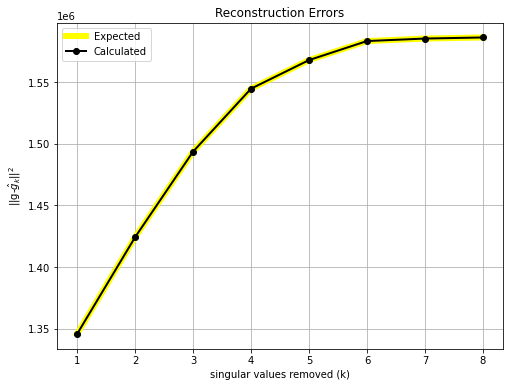

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(n)+1, reconstruction_errors_theoretical, 'yellow', linewidth=6)
plt.plot(np.arange(n)+1, reconstruction_errors_experimental,
         '-o', linewidth=2, color="black")
plt.xlabel("singular values removed (k)")
plt.ylabel(r'||g-$\hat{g}_{k}||^{2}$')
plt.legend(["Expected", "Calculated"])
plt.title("Reconstruction Errors")
plt.grid(True)
plt.show()

### Observation / Summary:

We can summarize with the following observations.
- DCT is better than WHT at both energy packing and decorrelation when we have covariance matrices of Markov-1 processes ($R$)
- Eigenvectors of $R$ are close to the DCT basis vectors but not exactly the same
- $\beta^{2}R^{-1}$ has roughly a tridiagonal structure
- DCT matrix exactly diagonalizes $Q_{\alpha}$, a tridiagonal matrix with parameter $\alpha$ and mostly diagonalizes $\beta^{2}R^{-1}$ but not completely
- Computing the $SVD$ for an image and reconstructing it using all the singular values gives an exact reconstruction
- The theoretical and calculated values for reconstruction errors on removing $k$ singular values is the sum of the squares of those $k$ singular values